<div style="padding:20px;color:white;margin:0;font-size:200%;text-align:center;display:fill;border-radius:5px;background-color:#38A6A5;overflow:hidden;font-weight:500">Titanic Spaceship</div>

# <b><span style='color:#444444'>1 |</span><span style='color:#38A6A5'> Competition Overview</span></b>

In this [competition](https://www.kaggle.com/competitions/spaceship-titanic/overview) your task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. To help you make these predictions, you're given a set of personal records recovered from the ship's damaged computer system.

In [1]:
#Import libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import LabelEncoder

from sklearn. metrics import accuracy_score, precision_score, recall_score, confusion_matrix

print("Libraries imported")

Libraries imported


In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [3]:
train = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
test = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")

# <b><span style='color:#444444'>1 |</span><span style='color:#38A6A5'> Meet and greet Data</span></b>

In [4]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
def missing_val(df):
    missing = df.isnull().sum()
    missing_percent = (df.isnull().sum()/df.shape[0] * 100).round(2)
    missing_df = pd.DataFrame({'column_name' : df.columns,
                               'missing' : missing,
                               'percent' : missing_percent})
   
    return missing_df

In [8]:
print("Train data missing values: " )
print(missing_val(train))
print('-' * 50)
print("Test data missing values: " )
print(missing_val(test))


Train data missing values: 
               column_name  missing  percent
PassengerId    PassengerId        0     0.00
HomePlanet      HomePlanet      201     2.31
CryoSleep        CryoSleep      217     2.50
Cabin                Cabin      199     2.29
Destination    Destination      182     2.09
Age                    Age      179     2.06
VIP                    VIP      203     2.34
RoomService    RoomService      181     2.08
FoodCourt        FoodCourt      183     2.11
ShoppingMall  ShoppingMall      208     2.39
Spa                    Spa      183     2.11
VRDeck              VRDeck      188     2.16
Name                  Name      200     2.30
Transported    Transported        0     0.00
--------------------------------------------------
Test data missing values: 
               column_name  missing  percent
PassengerId    PassengerId        0     0.00
HomePlanet      HomePlanet       87     2.03
CryoSleep        CryoSleep       93     2.17
Cabin                Cabin      100    

In [9]:
train.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

**Observations:**

1. There are lot of missing values(approx. 2%) in both train and test data.

**Field and data descriptions:**

train.csv - Personal records for about two-thirds (8700) of the passengers, to be used as training data.

PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.

CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

Destination - The planet the passenger will be debarking to.

Age - The age of the passenger.

VIP - Whether the passenger has paid for special VIP service during the voyage.

RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

Name - The first and last names of the passenger.

Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.


test.csv - Personal records for the remaining one-third (4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.

# <b><span style='color:#444444'>2 |</span><span style='color:#38A6A5'> Exploratory Data Analysis</span></b>

In [10]:
df_num = train[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported']]
df_cat = train[['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Transported']]

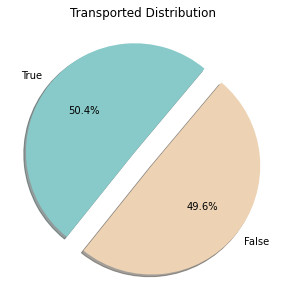

In [11]:
fig = plt.figure(figsize = (8,5))
df1 = pd.DataFrame(train.Transported.value_counts().reset_index())

plt.pie(data = df1,x = 'Transported', labels = 'index',colors = ['#88CAC9','#EDD3B3'], 
        autopct='%.1f%%' ,shadow =True,normalize = True,startangle = 50,explode=[0.1,0.1])
plt.title("Transported Distribution")

plt.show()

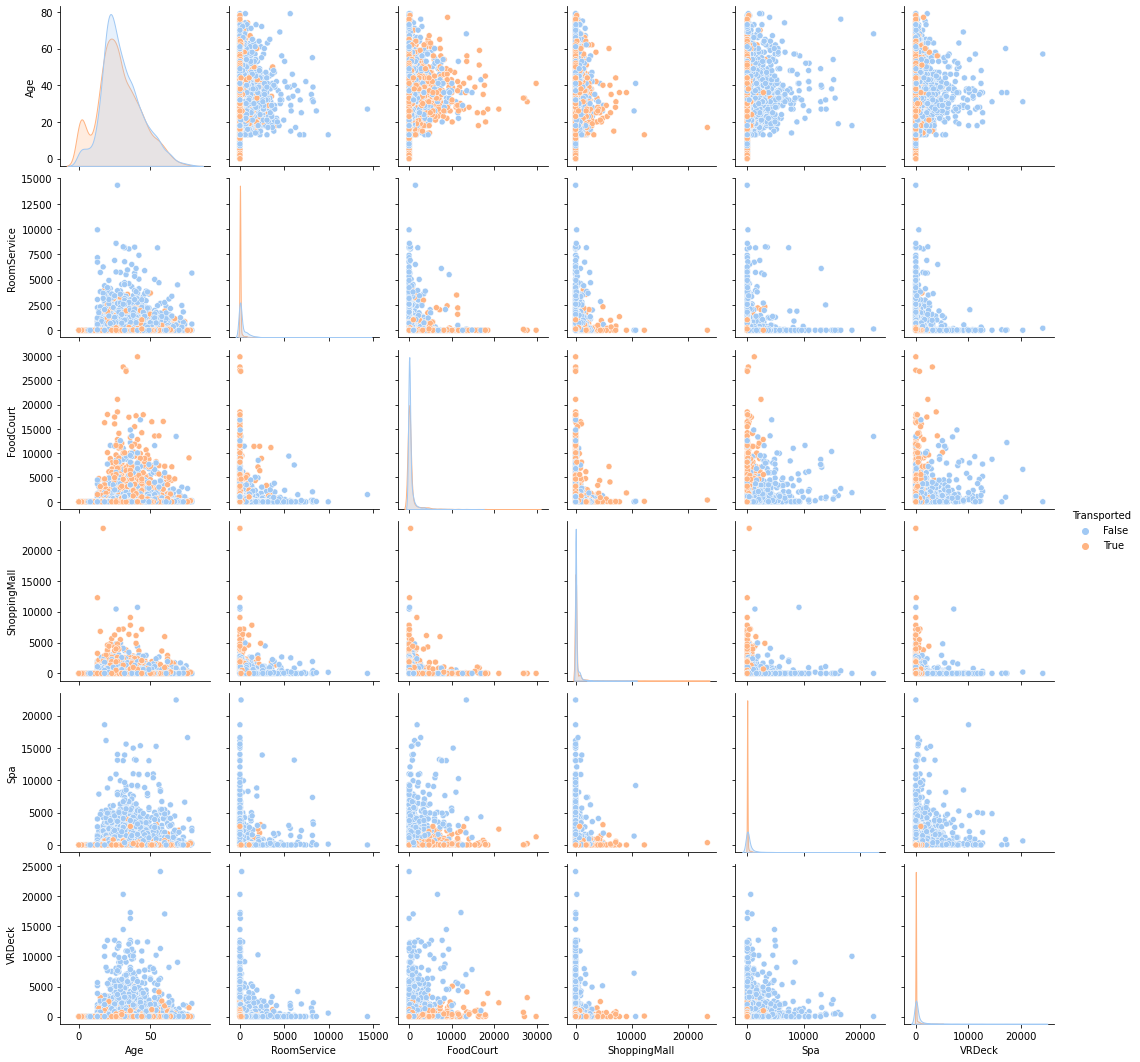

In [12]:
sns.pairplot(df_num,hue = 'Transported', palette = 'pastel')
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Count'>

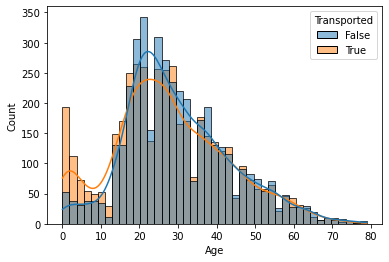

In [13]:
sns.histplot(data = train, x = 'Age', hue = "Transported",kde = True)

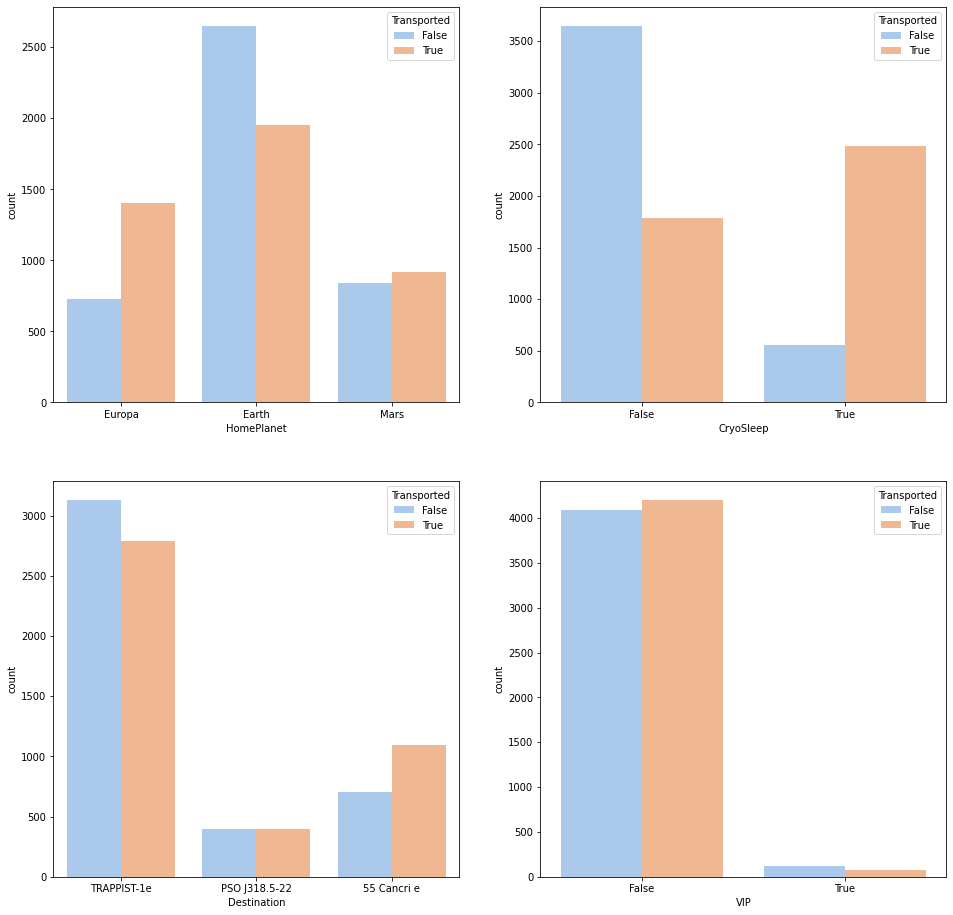

In [14]:
features = ['HomePlanet','CryoSleep', 'Destination','VIP' ]
plt.subplots(figsize = (16,16))
for i,col in enumerate(features):
    ax = plt.subplot(2,2,i+1)
    ax = sns.countplot(x = col, data = train, hue = 'Transported', palette = 'pastel')

plt.show()

<AxesSubplot:>

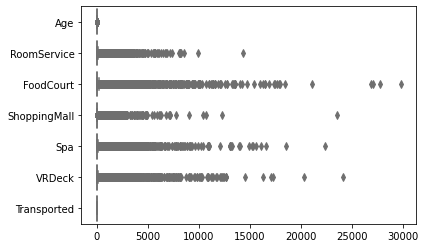

In [15]:
sns.boxplot(data=df_num, orient="h", palette="pastel")

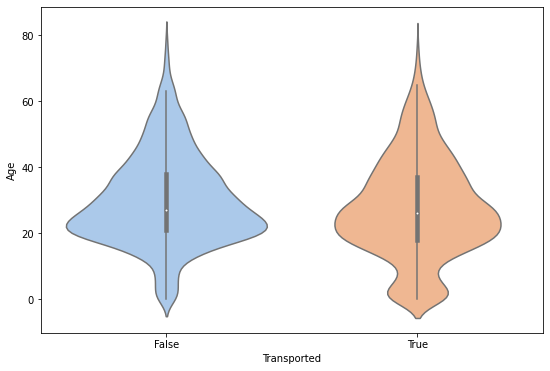

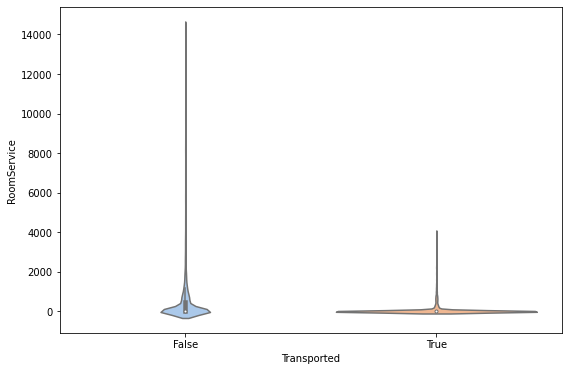

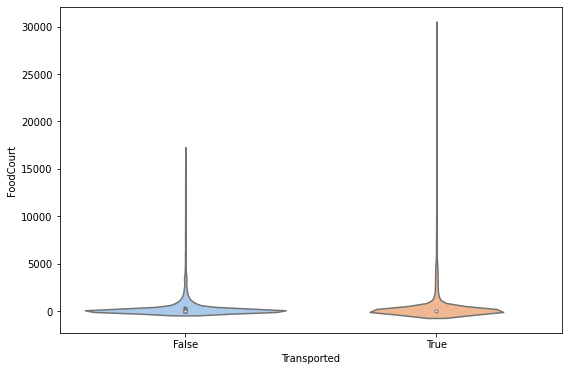

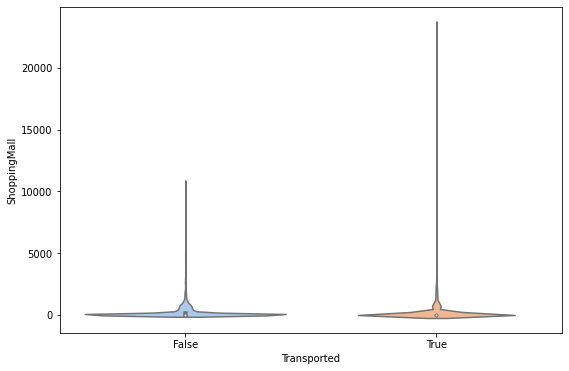

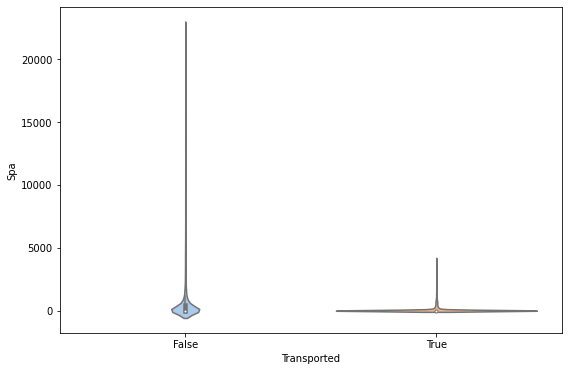

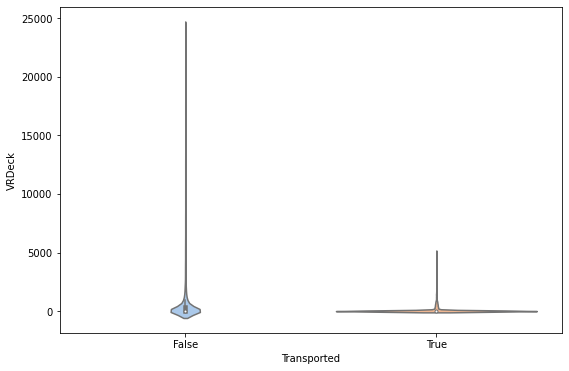

In [16]:

for i,col in enumerate(df_num.columns[:-1]):
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    ax = sns.violinplot(data=df_num, x="Transported", y=col,palette = 'pastel')
    
plt.show()

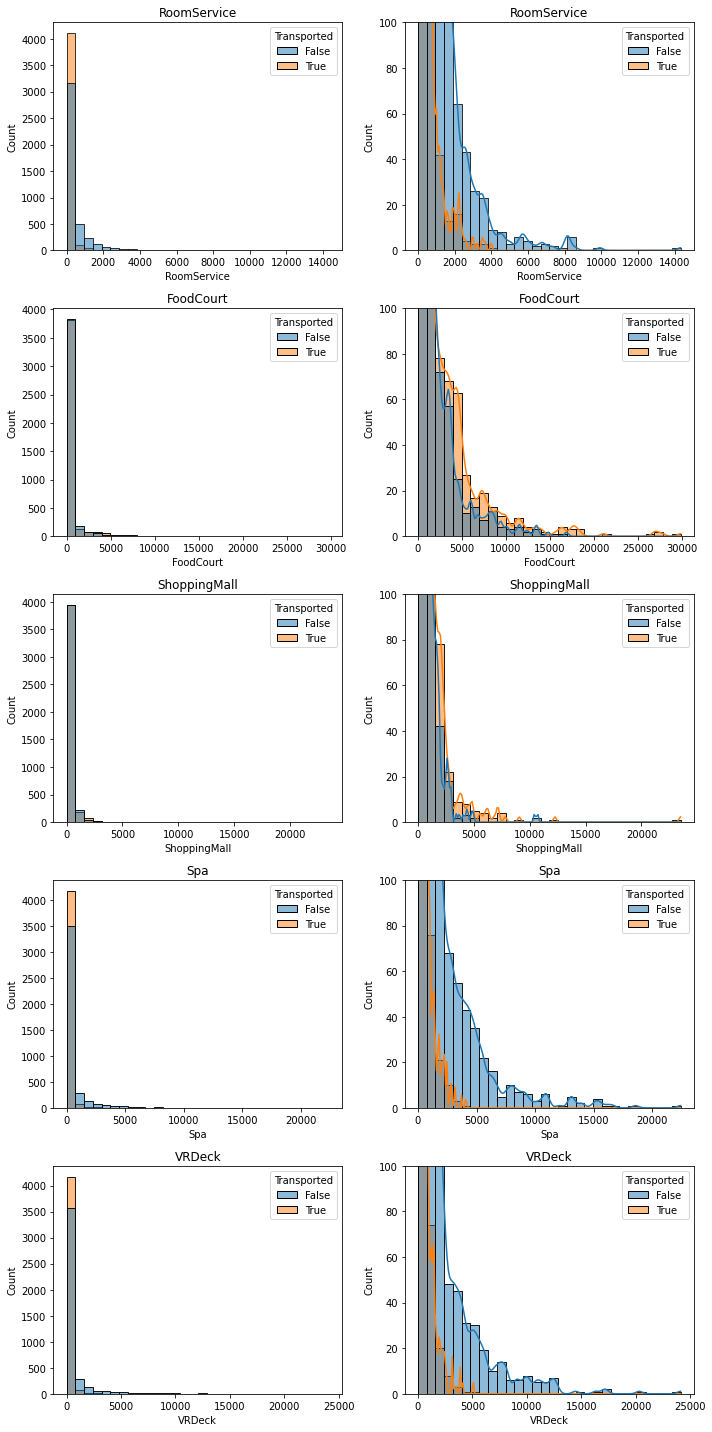

In [17]:
exp_feats=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Plot expenditure features
fig=plt.figure(figsize=(10,20))
for i, col in enumerate(exp_feats):
    # Left plot
    ax=fig.add_subplot(5,2,2*i+1)
    sns.histplot(data=train, x=col, axes=ax, bins=30, kde=False, hue='Transported')
    ax.set_title(col)
    
    # Right plot (truncated)
    ax=fig.add_subplot(5,2,2*i+2)
    sns.histplot(data=train, x=col, axes=ax, bins=30, kde=True, hue='Transported')
    plt.ylim([0,100])
    ax.set_title(col)
    fig.tight_layout()  # Improves appearance a bit
plt.show()

<AxesSubplot:>

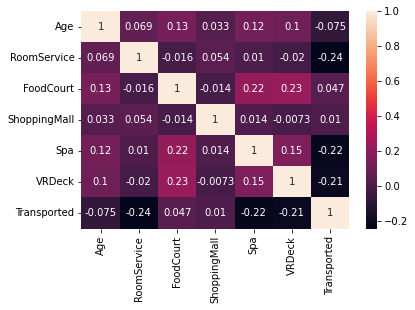

In [18]:
correlation = train.corr()
sns.heatmap(correlation, annot = True)

**Observations:**

1. People who were transported tended to spend less.
2. RoomService, Spa and VRDeck have different distributions to FoodCourt and ShoppingMall - we can think of this as luxury vs essential amenities.
3. 0-18 year olds were more likely to be transported than not.
   18-25 year olds were less likely to be transported than not.
   Over 25 year olds were about equally likely to be transported than not.
4. VIP and Destination do not appear to be a useful feature; the target split is more or less equal.
5. CryoSleep and Home Planet appear to be very useful feature in contrast.
6. The target is equally distributed. Sampling of any class is not required.

# <b><span style='color:#444444'>3 |</span><span style='color:#38A6A5'> Feature Engineering</span></b>



**New Features:**
1. Can derive the number of passengers and group number from Passenger Id.
2. Can derive the deck and side(Port,Starboard) from Cabin

In [19]:
features = ['PassengerId', 'Cabin' ,'Name']
train[features].head()

,PassengerId,Cabin,Name
0,0001_01,B/0/P,Maham Ofracculy
1,0002_01,F/0/S,Juanna Vines
2,0003_01,A/0/S,Altark Susent
3,0003_02,A/0/S,Solam Susent
4,0004_01,F/1/S,Willy Santantines


In [20]:
def new_features(df):
    #Features from Passenger Id
    df['Group'] = df['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)
    df['Group_size'] = df['Group'].map(lambda x: df['Group'].value_counts()[x])
    df['IsAlone'] = np.where((df["Group_size"] == 1),1,0)
 
    
    #Fill Missing Cabin Number
    df['Cabin'].fillna('Z/9999/Z', inplace=True)
    #New features from Cabin
    df['Cabin_deck'] = df['Cabin'].apply(lambda x: x.split('/')[0])
    df['Cabin_number'] = df['Cabin'].apply(lambda x: x.split('/')[1]).astype(int)
    df['Cabin_side'] = df['Cabin'].apply(lambda x: x.split('/')[2])
    return df
    
    

In [21]:
train = new_features(train)
test = new_features(test)

train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Group_size,IsAlone,Cabin_deck,Cabin_number,Cabin_side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,1,1,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,2,1,1,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,3,2,0,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,3,2,0,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,4,1,1,F,1,S


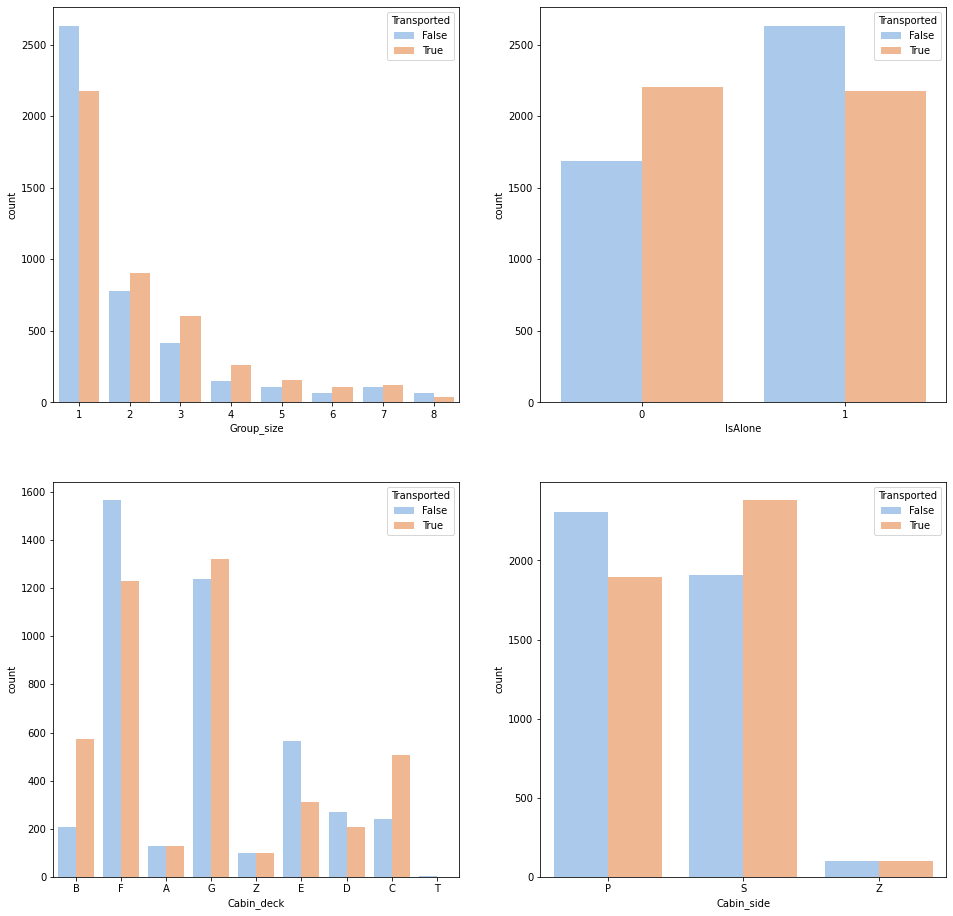

In [22]:
features = ['Group_size','IsAlone', 'Cabin_deck','Cabin_side']
plt.subplots(figsize = (16,16))
for i,col in enumerate(features):
    ax = plt.subplot(2,2,i+1)
    ax = sns.countplot(x = col, data = train, hue = 'Transported', palette = 'pastel')

plt.show()


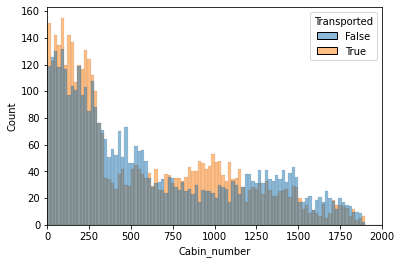

In [23]:
sns.histplot(data=train, x='Cabin_number', hue='Transported',binwidth=20)
plt.xlim([0,2000])
fig.tight_layout()

**Insights:**
1. Age and cabin numbers can be divided into bins.
2. Premium can be made out of joining RoomService, Spa and VRDeck.
3. Essential can be made out of joining FoodCourt and ShoppingMall.


In [24]:
def more_features(df):
    df['Premium'] = df.RoomService +  df.Spa + df.VRDeck
    df['Essential'] =  df.FoodCourt + df.ShoppingMall
    df['Age_bin'] = pd.cut(df.Age, bins=[0,20,35,50,90],
                       include_lowest=True)
    df['Cabin_number_bin'] = pd.cut(df.Cabin_number, bins=[0,300,600,900,1200,1500,2000],
                       include_lowest=True)
    
    return df
    

In [25]:
train = more_features(train)
test = more_features(test)

train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Group,Group_size,IsAlone,Cabin_deck,Cabin_number,Cabin_side,Premium,Essential,Age_bin,Cabin_number_bin
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,1,1,1,B,0,P,0.0,0.0,"(35.0, 50.0]","(-0.001, 300.0]"
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,2,1,1,F,0,S,702.0,34.0,"(20.0, 35.0]","(-0.001, 300.0]"
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,3,2,0,A,0,S,6807.0,3576.0,"(50.0, 90.0]","(-0.001, 300.0]"
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,3,2,0,A,0,S,3522.0,1654.0,"(20.0, 35.0]","(-0.001, 300.0]"
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,4,1,1,F,1,S,870.0,221.0,"(-0.001, 20.0]","(-0.001, 300.0]"


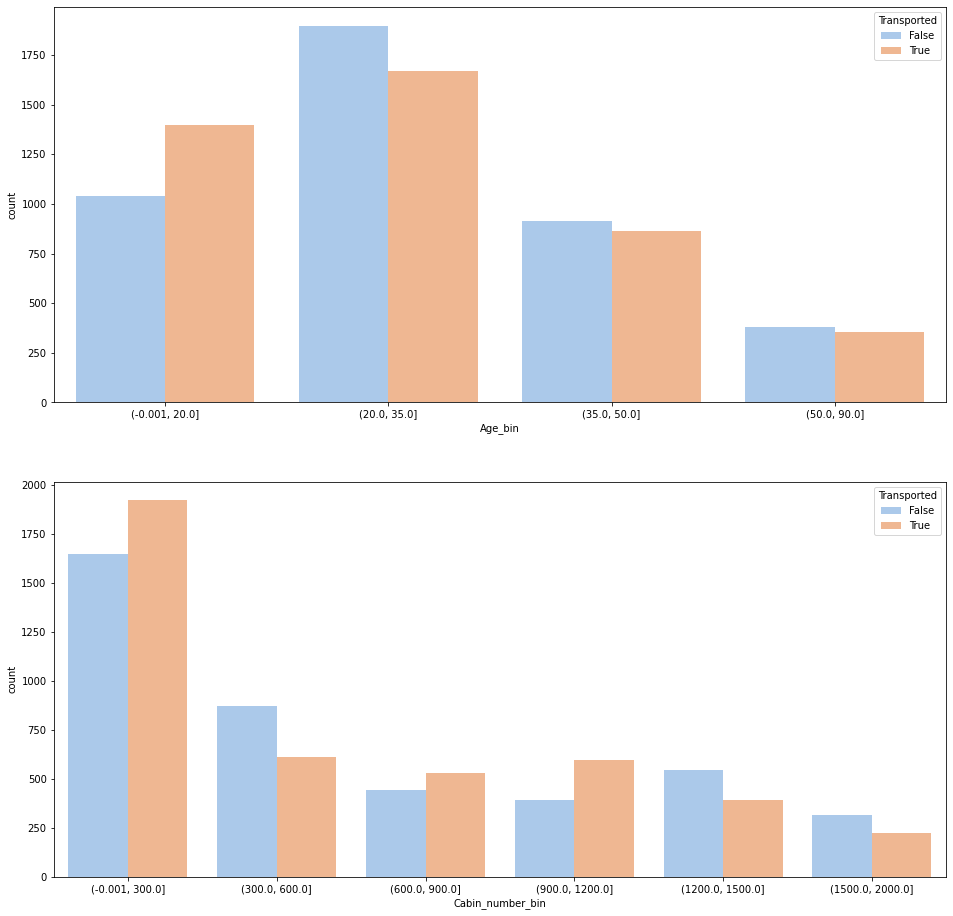

In [26]:
plt.subplots(figsize = (16,16))
ax1 = plt.subplot(2,1,1)
ax1 = sns.countplot(data=train, x='Age_bin', hue='Transported', palette = 'pastel') 

ax2 = plt.subplot(2,1,2)
ax2 = sns.countplot(data=train, x='Cabin_number_bin', hue='Transported', palette = 'pastel') 

plt.show()

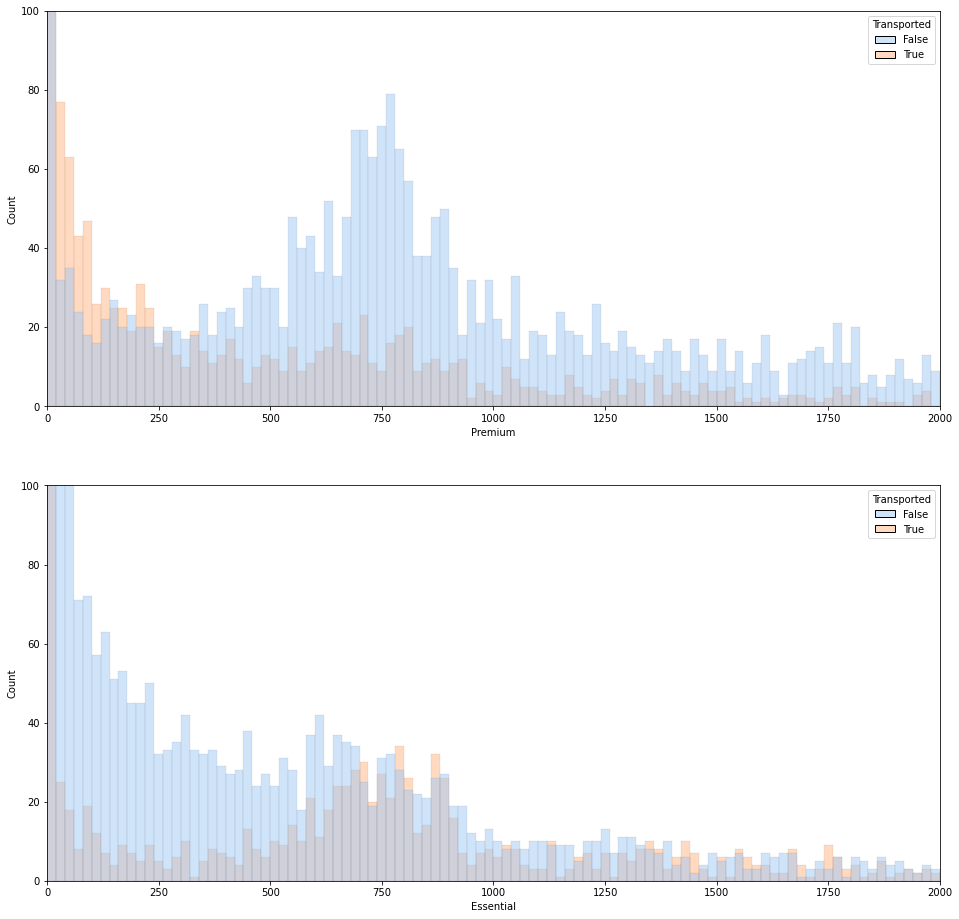

In [27]:
features = ['Premium','Essential']
plt.subplots(figsize = (16,16))
for i,col in enumerate(features):
    ax = plt.subplot(2,1,i+1)
    ax1 = sns.histplot(data=train, x=col, hue='Transported',binwidth = 20, palette = 'pastel') 
    plt.ylim([0,100])
    plt.xlim([0,2000])

plt.show()


In [28]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Group,Group_size,IsAlone,Cabin_deck,Cabin_number,Cabin_side,Premium,Essential,Age_bin,Cabin_number_bin
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,1,1,1,B,0,P,0.0,0.0,"(35.0, 50.0]","(-0.001, 300.0]"
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,2,1,1,F,0,S,702.0,34.0,"(20.0, 35.0]","(-0.001, 300.0]"
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,3,2,0,A,0,S,6807.0,3576.0,"(50.0, 90.0]","(-0.001, 300.0]"
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,3,2,0,A,0,S,3522.0,1654.0,"(20.0, 35.0]","(-0.001, 300.0]"
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,4,1,1,F,1,S,870.0,221.0,"(-0.001, 20.0]","(-0.001, 300.0]"


# <b><span style='color:#444444'>4 |</span><span style='color:#38A6A5'> Missing Values</span></b>

1. The easiest was to fill missing values is fill them with median value for numeric columns and with mode for categorical columns.

2. HomePlanet - The people who are travelling in a group, there homeplanet will be same. So will read the homeplanet where group size is more than 1.


In [29]:
def fill_nan_HomePlanet(df):
    df_grp=df.groupby(['Group','HomePlanet'])['HomePlanet'].size().unstack().fillna(0)

    grp_index=df[df['HomePlanet'].isna()][(df[df['HomePlanet'].isna()]['Group']).isin(df_grp.index)].index


    df.loc[grp_index,'HomePlanet']=df.iloc[grp_index,:]['Group'].map(lambda x: df_grp.idxmax(axis=1)[x])
    
    return df   

In [30]:
def fill_nan(df):

    for col in df[df.columns[0:-1]]:
        if df[col].dtype == 'float64':
            df[col] = df[col].fillna(value = df[col].mean())
        else:
            df[col] = df[col].fillna(value = df[col].mode()[0])
    
    return df


In [31]:
train = fill_nan_HomePlanet(train)
train = fill_nan(train)

test = fill_nan_HomePlanet(test)
test = fill_nan(test)

train.isnull().sum()


PassengerId           0
HomePlanet            0
CryoSleep             0
Cabin                 0
Destination           0
Age                   0
VIP                   0
RoomService           0
FoodCourt             0
ShoppingMall          0
Spa                   0
VRDeck                0
Name                  0
Transported           0
Group                 0
Group_size            0
IsAlone               0
Cabin_deck            0
Cabin_number          0
Cabin_side            0
Premium               0
Essential             0
Age_bin               0
Cabin_number_bin    199
dtype: int64

# <b><span style='color:#444444'>5 |</span><span style='color:#38A6A5'> Preprocessing Data</span></b>

First we use label encoding to convert categorical columns into their numerical equivalent values.

After that we use Standard Scalar to scale the values.

In [32]:

def preprocess_data(df):
    cat_features = ['HomePlanet','CryoSleep','Cabin_deck','Cabin_side',
                    'Age_bin','Cabin_number_bin']

    label = LabelEncoder()
    for col in df[cat_features]:
        df[col] = label.fit_transform(df[col])
    
    scaler = StandardScaler()
    df = scaler.fit_transform(df)
    return df
    

In [33]:
features = ['HomePlanet','CryoSleep','Group_size','Cabin_deck','Cabin_side','Premium', 'Essential',
            'Age_bin','Cabin_number_bin']
label = 'Transported'
df_X, y = train[features], train[label].values

X = preprocess_data(df_X)

df_test_f = test[features]
df_test_final = preprocess_data(df_test_f)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [34]:
# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

Training cases: 6085
Test cases: 2608


# <b><span style='color:#444444'>6 |</span><span style='color:#38A6A5'> Model</span></b>

In [35]:
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

We have used GridSearch to find the best parameters to train the model.

In [36]:
from sklearn.model_selection import GridSearchCV
lgbm = LGBMClassifier(random_state=0)
grid = {'n_estimators': [50, 100, 150, 200],
        'max_depth': [4, 8, 12],
        'learning_rate': [0.05, 0.1, 0.15]}

clf = GridSearchCV(estimator=lgbm, param_grid=grid, n_jobs=-1, cv=None)

clf.fit(X_train, y_train)

print(clf.best_params_)

print(clf.best_score_)

{'learning_rate': 0.05, 'max_depth': 12, 'n_estimators': 100}
0.8067378800328677


In [37]:
#Train the model
model = LGBMClassifier(n_estimators = 100, 
                      learning_rate = 0.05, 
                      random_state=0, 
                      max_depth = 12)

model.fit(X_train,y_train)

# Get predictions from test data
predictions = model.predict(X_test)

In [38]:
from sklearn. metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Get metrics
print("Overall Accuracy:",accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions, average='macro'))
print("Overall Recall:",recall_score(y_test, predictions, average='macro'))

Overall Accuracy: 0.8090490797546013
Overall Precision: 0.8099470618594706
Overall Recall: 0.8090283842473749


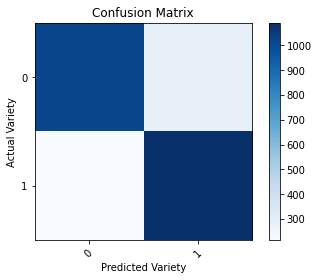

In [39]:
# Plot confusion matrix
cm = confusion_matrix(y_test, predictions)
classes = ['0','1']
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.title('Confusion Matrix')
plt.xlabel("Predicted Variety")
plt.ylabel("Actual Variety")
plt.show()

AUC: 0.898455965161446


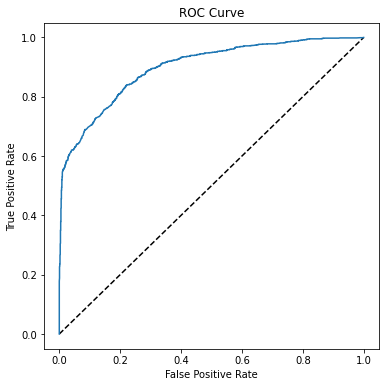

In [40]:
from sklearn.metrics import roc_curve, roc_auc_score

y_scores = model.predict_proba(X_test)
auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# <b><span style='color:#444444'>7 |</span><span style='color:#38A6A5'> Submission</span></b>

We will train the model again with complete training dataset before submitting the results.

In [41]:
model.fit(X,y)

# Get predictions from test data
predictions = model.predict(df_test_final)

predictions

array([ True, False,  True, ...,  True,  True,  True])

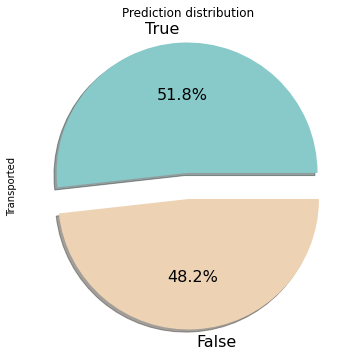

In [42]:
submit =pd.read_csv('../input/spaceship-titanic/sample_submission.csv')

# Add predictions
submit['Transported']=predictions

# Replace 0 to False and 1 to True
submit=submit.replace({0:False, 1:True})

# Prediction distribution
plt.figure(figsize=(6,6))
submit['Transported'].value_counts().plot.pie(explode=[0.1,0.1], colors = ['#88CAC9','#EDD3B3'],autopct='%1.1f%%', shadow=True, textprops={'fontsize':16}).set_title("Prediction distribution")

plt.show()

In [43]:
# Output to csv
submit.to_csv('submission.csv', index=False)

**References:**

1. Visualizations help from https://www.kaggle.com/code/kellibelcher/tps-may-2022-eda-lgbm-neural-networks

2. Data Analysis help : https://www.kaggle.com/code/samuelcortinhas/spaceship-titanic-a-complete-guide#EDA
